<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 2. Визуальный анализ данных
## <center>Практическое задание. Визуальный анализ данных по пассажирам "Титаника". Решение

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

**Считываем обучающую выборку.**

In [2]:
train_df = pd.read_csv("../../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [3]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [6]:
train_df = train_df.drop('Cabin', axis=1).dropna()

In [7]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

In [14]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [16]:
# Ваш код здесь
data1 = train_df.drop(['Name', 'Embarked'], axis=1)

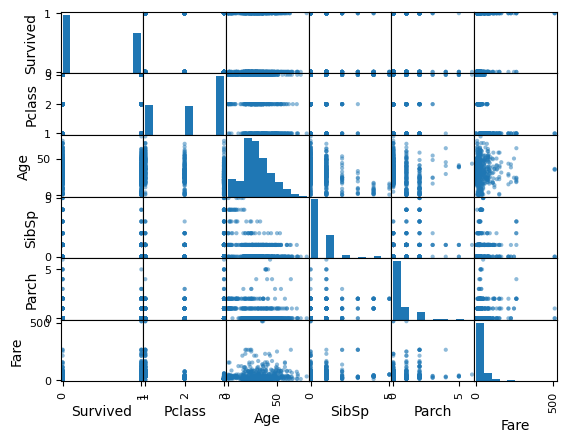

In [21]:
pd.plotting.scatter_matrix(data1);

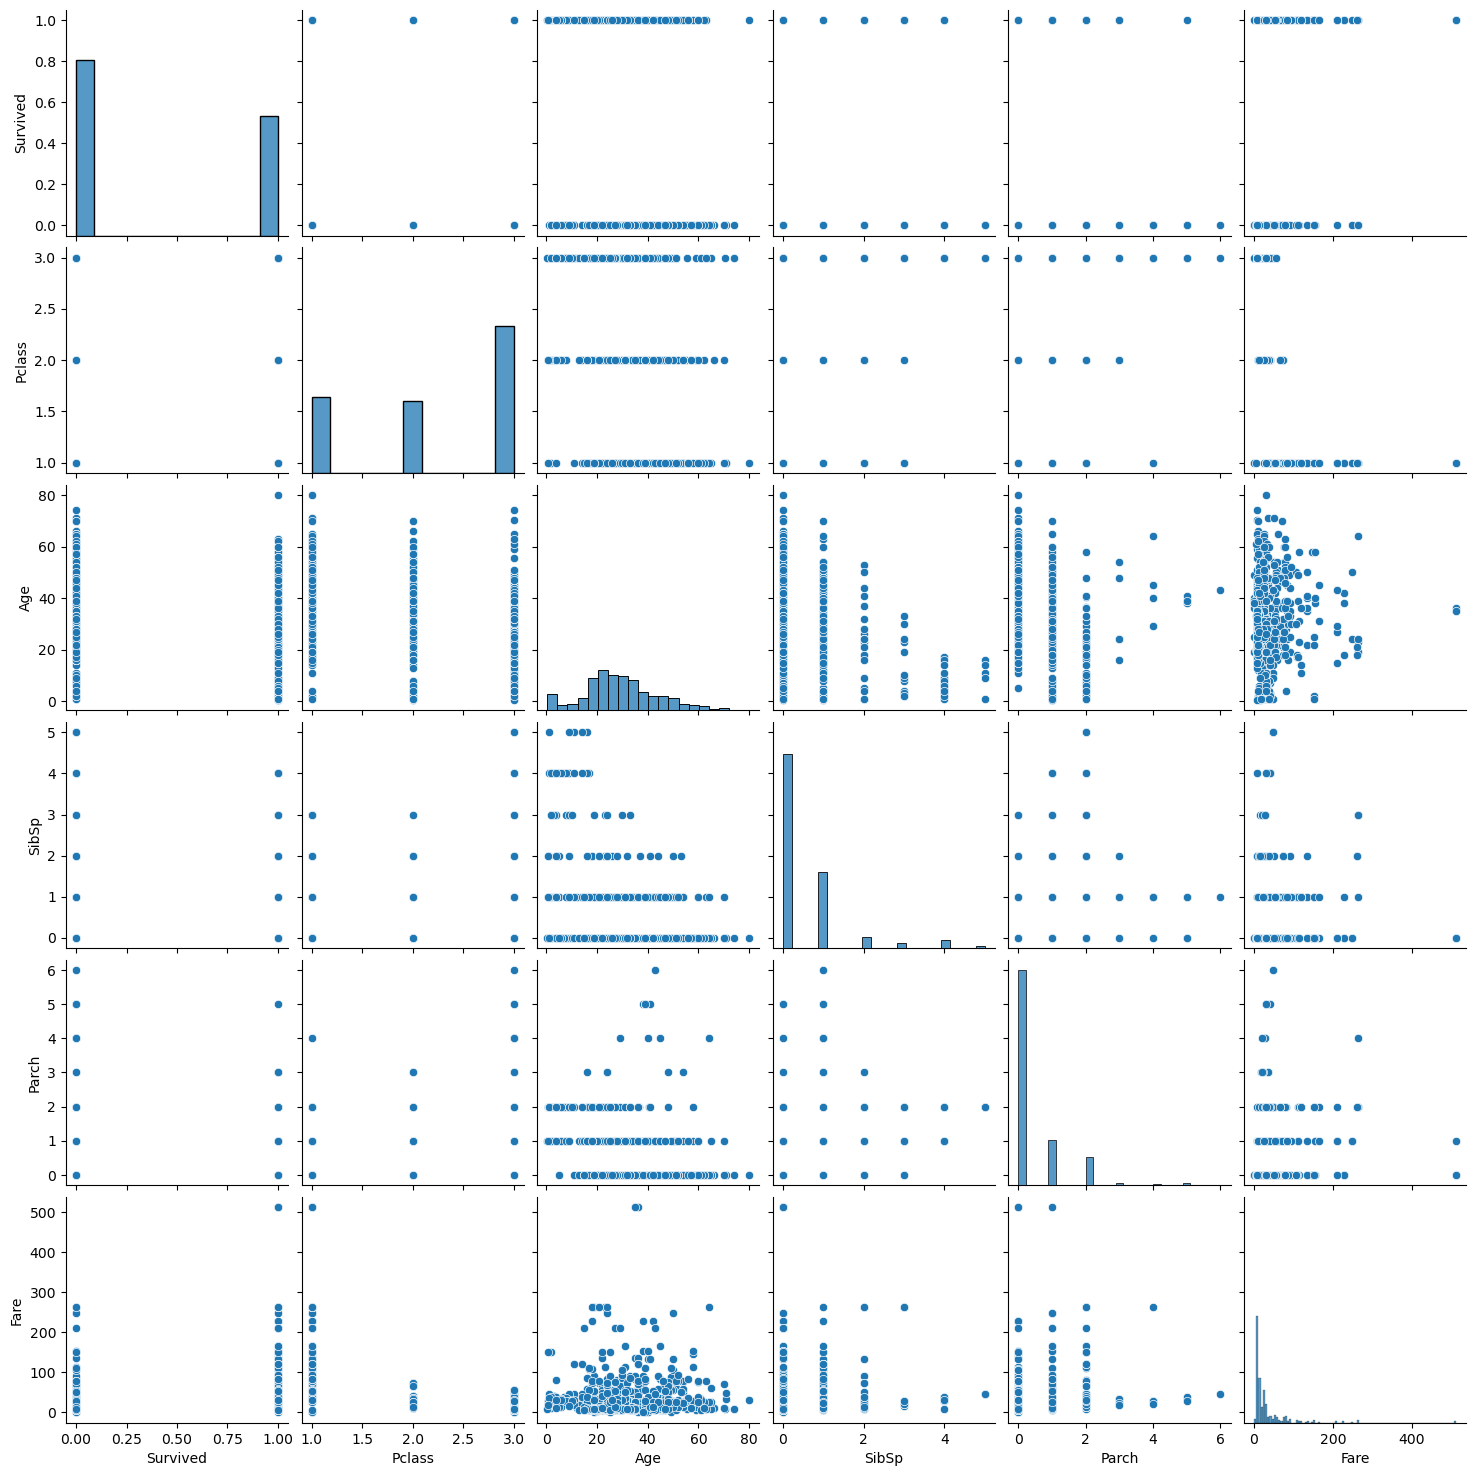

In [22]:
sns.pairplot(data1);

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

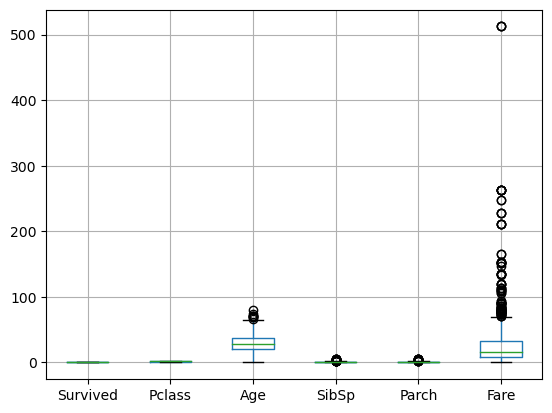

In [24]:
# Ваш код здесь
pd.DataFrame.boxplot(data1);

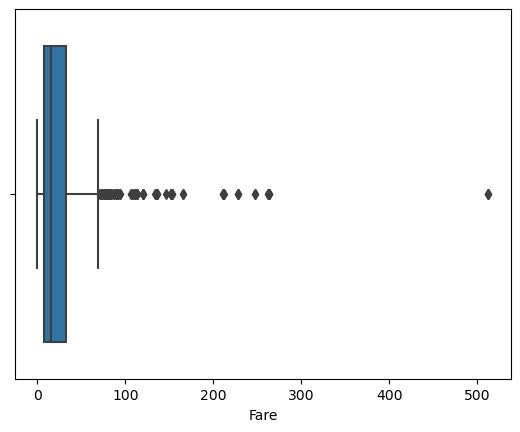

In [27]:
sns.boxplot(x=data1['Fare']);

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

In [48]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
pd.Series.to_frame(fare_pclass1).columns

Index(['Fare'], dtype='object')

In [71]:
#find Q1, Q3, and interquartile range for each column
Q1 = train_df.Fare.quantile(q=.25)
Q3 = train_df.Fare.quantile(q=.75)
IQR = Q3-Q1
down = Q1 - 1.5*IQR
up = Q3 + 1.5*IQR

8.05 33.0


In [77]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = pd.Series.to_frame(train_df[train_df['Pclass'] == 1]['Fare'])
fare_pclass2 = pd.Series.to_frame(train_df[train_df['Pclass'] == 2]['Fare'])
fare_pclass3 = pd.Series.to_frame(train_df[train_df['Pclass'] == 3]['Fare'])

fare_pclass1_no_out = fare_pclass1[(up>=fare_pclass1.Fare) & (down<=fare_pclass1.Fare)]
fare_pclass2_no_out = fare_pclass2[(up>=fare_pclass2.Fare) & (down<=fare_pclass2.Fare)]
fare_pclass3_no_out = fare_pclass3[(up>=fare_pclass3.Fare) & (down<=fare_pclass3.Fare)]
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                             .append(fare_pclass3_no_out)

C:\Users\Кирилл Ванифатов\AppData\Local\Temp\ipykernel_18800\564373609.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
C:\Users\Кирилл Ванифатов\AppData\Local\Temp\ipykernel_18800\564373609.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\


In [73]:
fare_pclass1_no_out.shape

(94, 1)

In [75]:
fare_pclass1.shape

(184, 1)

In [78]:
fare_pclass1_no_out

,Fare
PassengerId,
4,53.1000
7,51.8625
12,26.5500
24,35.5000
31,27.7208
...,...
868,50.4958
872,52.5542
873,5.0000


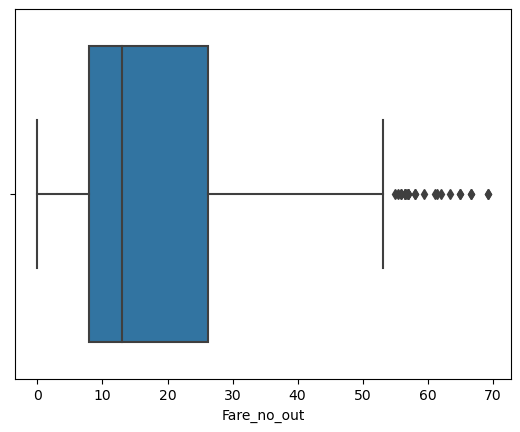

In [81]:
sns.boxplot(x=train_df['Fare_no_out']);

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

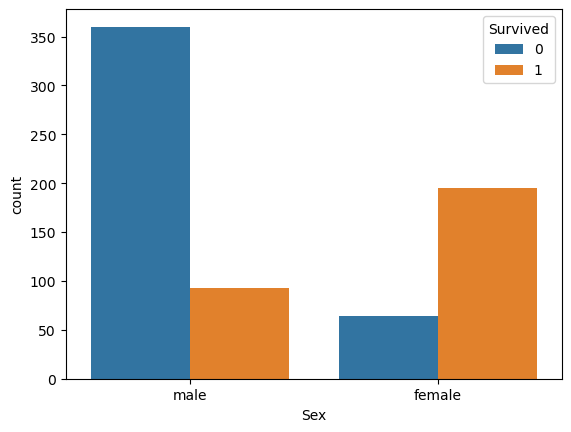

In [82]:
# Ваш код здесь

# count plot on two categorical variable
sns.countplot(x ='Sex', hue = "Survived", data = train_df)
 
# Show the plot
plt.show()

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

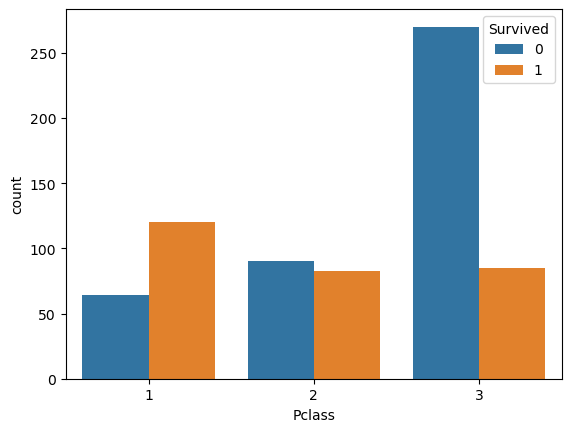

In [83]:
# Ваш код здесь

# count plot on two categorical variable
sns.countplot(x ='Pclass', hue = "Survived", data = train_df)
 
# Show the plot
plt.show()

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

In [84]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <=60 -> 2
    > 60 -> 3
    """
    if age < 30:
        return 1
    elif age <= 60:
        return 2
    else:
        return 3

In [85]:
data = train_df.copy()
data["Age_category"] = data["Age"].apply(age_category)

In [86]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_no_out,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.250,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,NaN,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.925,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,53.100,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8.050,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,29.125,2
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,13.000,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,30.000,1


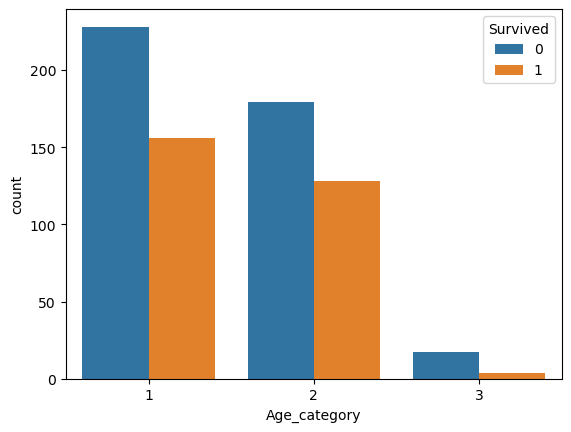

In [88]:
# Ваш код здесь

# count plot on two categorical variable
sns.countplot(x ='Age_category', hue = "Survived", data = data)
 
# Show the plot
plt.show()